# Training the models - Version 2

#### Preparations

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score


from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier

from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

In [2]:
# Change file name (path) as necessary
# Read the data
df = pd.read_csv("../data/bachelor/df_training.csv", sep=',')

pd.set_option('display.max_columns', 47)
random.seed(10)
#df.head()

In [3]:
# Check data types
df.dtypes

id                                int64
person.UUID                      object
study.place.UUID                 object
debug.study.place.ID              int64
debug.student.matricula.nr       object
study.level                      object
code.of.curriculum                int64
curriculum.UUID                  object
faculty.code                     object
year_immatriculation              int64
year_exmatriculation              int64
semester_current                float64
study_period_in_years             int64
dropout                           int64
admission.special.conditions    float64
prev.study.level                 object
prev.study.level.factor           int64
nr.of.previous.studies.in.UT      int64
nr.of.previous.finished           int64
normalized_score                float64
cum.credits.earned              float64
cum.extracurricular.credits     float64
cum.all.results                   int64
cum.negative.results              int64
cum.grade.A                       int64


In [4]:
# Drop person.UUID, study.place.UUID, debug.study.place.ID and debug.student.matricula.nr,
# because it's not reasonable to encode/use them.
df = df.drop(["person.UUID", "study.place.UUID", "debug.study.place.ID", "debug.student.matricula.nr"], axis=1)

In [5]:
# Encode study level
df["study.level"] = df["study.level"].astype('category')
df["study.level"] = df["study.level"].cat.codes

In [6]:
# Encode curriculum
df["curriculum.UUID"] = df["curriculum.UUID"].astype('category')
df["curriculum.UUID"] = df["curriculum.UUID"].cat.codes

In [7]:
# Encode faculty code
df["faculty.code"] = df["faculty.code"].astype('category')
df["faculty.code"] = df["faculty.code"].cat.codes

In [8]:
# Encode previous study level
df["prev.study.level"] = df["prev.study.level"].astype('category')
df["prev.study.level"] = df["prev.study.level"].cat.codes

In [9]:
# Encode workload
df["workload"] = df["workload"].astype('category')
df["workload"] = df["workload"].cat.codes

## 1) No Sampling

In [10]:
# Get X and y from data
X1 = df.drop('dropout', axis=1)
y1 = df['dropout']

In [11]:
# Separate 
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X1, y1, test_size=0.2, random_state=0)
X_val_1, X_test_1, y_val_1, y_test_1 = train_test_split(X_test_1, y_test_1, test_size=0.5, random_state=0)

In [12]:
# Decision Tree
model_tree_1 = DecisionTreeClassifier()
model_tree_1 = model_tree_1.fit(X_train_1, y_train_1)

tree_pred = model_tree_1.predict(X_val_1)

tree_fscore = f1_score(y_val_1, tree_pred)

In [13]:
# Random Forest
model_randomForest_1 = RandomForestClassifier()
model_randomForest_1 = model_randomForest_1.fit(X_train_1, y_train_1)

randomForest_pred = model_randomForest_1.predict(X_val_1)

randomForest_fscore = f1_score(y_val_1, randomForest_pred)

In [14]:
# K-nearest neighbors
model_KNN_1 = KNeighborsClassifier()
model_KNN_1 = model_KNN_1.fit(X_train_1, y_train_1)

KNN_pred = model_KNN_1.predict(X_val_1)

KNN_fscore = f1_score(y_val_1, KNN_pred)

/Users/Kertu/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [15]:
# GaussianNB
model_GaussianNB_1 = GaussianNB()
model_GaussianNB_1 = model_GaussianNB_1.fit(X_train_1, y_train_1)

GaussianNB_pred = model_GaussianNB_1.predict(X_val_1)

GaussianNB_fscore = f1_score(y_val_1, GaussianNB_pred)

In [16]:
# AdaBoost
model_AdaBoost_1 = AdaBoostClassifier()
model_AdaBoost_1 = model_AdaBoost_1.fit(X_train_1, y_train_1)

AdaBoost_pred = model_AdaBoost_1.predict(X_val_1)

AdaBoost_pred = f1_score(y_val_1, AdaBoost_pred)

In [17]:
print("F-scores on non-sampled data")
print("\tDecision tree:", tree_fscore)
print("\tRandom forest:", randomForest_fscore)
print("\tK Neighbors:  ", KNN_fscore)
print("\tGaussianNB:   ", GaussianNB_fscore)
print("\tAda Boost:    ", AdaBoost_pred)

F-scores on non-sampled data
	Decision tree: 0.681704260651629
	Random forest: 0.7475083056478404
	K Neighbors:   0.6059544658493871
	GaussianNB:    0.7558620689655172
	Ada Boost:     0.7606973058637084


## 2) Undersampling

In [18]:
# Split data into X and y (separate the features and labels)
X2 = df.drop('dropout', axis=1)
y2 = df['dropout']

# Separate into test, train and validation sets
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X2, y2, test_size=0.2, random_state=0)
X_val_2, X_test_2, y_val_2, y_test_2 = train_test_split(X_test_2, y_test_2, test_size=0.5, random_state=0)

# Perform undersampling on the training set
rus = RandomUnderSampler(random_state=0)
X_train_undersampled, y_train_undersampled = rus.fit_resample(X_train_2, y_train_2)

In [19]:
# Decision Tree
model_tree_2 = DecisionTreeClassifier()
model_tree_2 = model_tree_2.fit(X_train_undersampled, y_train_undersampled)

tree_pred = model_tree_2.predict(X_val_2)

tree_fscore = f1_score(y_val_2, tree_pred)

In [20]:
# Random Forest
model_randomForest_2 = RandomForestClassifier()
model_randomForest_2 = model_randomForest_2.fit(X_train_undersampled, y_train_undersampled)

randomForest_pred = model_randomForest_2.predict(X_val_2)

randomForest_fscore = f1_score(y_val_2, randomForest_pred)

In [21]:
# K-nearest neighbors
model_KNN_2 = KNeighborsClassifier()
model_KNN_2 = model_KNN_2.fit(X_train_undersampled, y_train_undersampled)

KNN_pred = model_KNN_2.predict(X_val_2)

KNN_fscore = f1_score(y_val_2, KNN_pred)

/Users/Kertu/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [22]:
# GaussianNB
model_GaussianNB_2 = GaussianNB()
model_GaussianNB_2 = model_GaussianNB_2.fit(X_train_undersampled, y_train_undersampled)

GaussianNB_pred = model_GaussianNB_2.predict(X_val_2)

GaussianNB_fscore = f1_score(y_val_2, GaussianNB_pred)

In [23]:
# AdaBoost
model_AdaBoost_2 = AdaBoostClassifier()
model_AdaBoost_2 = model_AdaBoost_2.fit(X_train_undersampled, y_train_undersampled)

AdaBoost_pred = model_AdaBoost_2.predict(X_val_2)

AdaBoost_pred = f1_score(y_val_2, AdaBoost_pred)

In [24]:
print("F-scores on undersampled data")
print("\tDecision tree:", tree_fscore)
print("\tRandom forest:", randomForest_fscore)
print("\tK Neighbors:  ", KNN_fscore)
print("\tGaussianNB:   ", GaussianNB_fscore)
print("\tAda Boost:    ", AdaBoost_pred)

F-scores on undersampled data
	Decision tree: 0.6872700515084621
	Random forest: 0.7730978260869567
	K Neighbors:   0.6438446346280448
	GaussianNB:    0.757201646090535
	Ada Boost:     0.7764060356652949


## 3) Oversampling

In [25]:
# Get X and y from data
X3 = df.drop('dropout', axis=1)
y3 = df['dropout']

# Separate into test, train and validation sets
X_train_3, X_test_3, y_train_3, y_test_3 = train_test_split(X3, y3, test_size=0.2, random_state=0)
X_val_3, X_test_3, y_val_3, y_test_3 = train_test_split(X_test_3, y_test_3, test_size=0.5, random_state=0)

# Perform oversampling on the training set
ros = RandomOverSampler(random_state=0)
X_train_oversampled, y_train_oversampled = ros.fit_resample(X_train_3, y_train_3)

In [26]:
# Decision Tree
model_tree_3 = DecisionTreeClassifier()
model_tree_3 = model_tree_3.fit(X_train_oversampled, y_train_oversampled)

tree_pred = model_tree_3.predict(X_val_3)

tree_fscore = f1_score(y_val_3, tree_pred)

In [27]:
# Random Forest
model_randomForest_3 = RandomForestClassifier()
model_randomForest_3 = model_randomForest_3.fit(X_train_oversampled, y_train_oversampled)

randomForest_pred = model_randomForest_3.predict(X_val_3)

randomForest_fscore = f1_score(y_val_3, randomForest_pred)

In [28]:
# K-nearest neighbors
model_KNN_3 = KNeighborsClassifier()
model_KNN_3 = model_KNN_3.fit(X_train_oversampled, y_train_oversampled)

KNN_pred = model_KNN_3.predict(X_val_3)

KNN_fscore = f1_score(y_val_3, KNN_pred)

/Users/Kertu/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [29]:
# GaussianNB
model_GaussianNB_3 = GaussianNB()
model_GaussianNB_3 = model_GaussianNB_3.fit(X_train_oversampled, y_train_oversampled)

GaussianNB_pred = model_GaussianNB_3.predict(X_val_3)

GaussianNB_fscore = f1_score(y_val_3, GaussianNB_pred)

In [30]:
# AdaBoost
model_AdaBoost_3 = AdaBoostClassifier()
model_AdaBoost_3 = model_AdaBoost_3.fit(X_train_oversampled, y_train_oversampled)

AdaBoost_pred = model_AdaBoost_3.predict(X_val_3)

AdaBoost_pred = f1_score(y_val_3, AdaBoost_pred)

In [31]:
print("F-scores on oversampled data")
print("\tDecision tree:", tree_fscore)
print("\tRandom forest:", randomForest_fscore)
print("\tK Neighbors:  ", KNN_fscore)
print("\tGaussianNB:   ", GaussianNB_fscore)
print("\tAda Boost:    ", AdaBoost_pred)

F-scores on oversampled data
	Decision tree: 0.6589211618257261
	Random forest: 0.7741433021806854
	K Neighbors:   0.6406570841889118
	GaussianNB:    0.7577213452299245
	Ada Boost:     0.7643484132343011


## The best models
The best models turned out to be:
1. Random Forest Classifier on oversampled data (F-score: 0.7834245504300233)
2. Random Forest Classifier on undersampled data (F-score: 0.7780068728522337)
3. AdaBoost on undersampled data (F-score: 0.7764060356652949)

The next section is about determining what features these models use for classification and further analysis on test data (not validation data).

In [32]:
# Using AdaBoost on undersampled data
y_pred = model_AdaBoost_2.predict(X_test_2)
proba = model_AdaBoost_2.predict_proba(X_test_2)[:, 1]

# Getting the metrics
accuracy = accuracy_score(y_test_2, y_pred)
precision = precision_score(y_test_2, y_pred)
recall = recall_score(y_test_2, y_pred)
fscore = f1_score(y_test_2, y_pred)
roc_auc = roc_auc_score(y_test_2, proba)

# Printing the metrics
print("Using AdaBoost on undersampled data")
print("\tAccuracy:", accuracy)
print("\tPrecision:", precision)
print("\tRecall:", recall)
print("\tF1-score:", fscore)
print("\tROC AUC:", roc_auc)

Using AdaBoost on undersampled data
	Accuracy: 0.8235023041474654
	Precision: 0.6386083052749719
	Recall: 0.9031746031746032
	F1-score: 0.7481919789612097
	ROC AUC: 0.9166702741702741


In [33]:
# Using Random Forest Classifier on undersampled data
y_pred = model_randomForest_2.predict(X_test_2)
proba = model_randomForest_2.predict_proba(X_test_2)[:, 1]

# Getting the metrics
accuracy = accuracy_score(y_test_2, y_pred)
precision = precision_score(y_test_2, y_pred)
recall = recall_score(y_test_2, y_pred)
fscore = f1_score(y_test_2, y_pred)
roc_auc = roc_auc_score(y_test_2, proba)

# Printing the metrics
print("Using Random Forest Classifier on undersampled data")
print("\tAccuracy:", accuracy)
print("\tPrecision:", precision)
print("\tRecall:", recall)
print("\tF1-score:", fscore)
print("\tROC AUC:", roc_auc)

Using Random Forest Classifier on undersampled data
	Accuracy: 0.8345622119815668
	Precision: 0.6524184476940382
	Recall: 0.9206349206349206
	F1-score: 0.7636603028308098
	ROC AUC: 0.9291352298495157


In [34]:
# Using Random Forest Classifier on oversampled data
y_pred = model_randomForest_3.predict(X_test_3)
proba = model_randomForest_3.predict_proba(X_test_3)[:, 1]

# Getting the metrics
accuracy = accuracy_score(y_test_3, y_pred)
precision = precision_score(y_test_3, y_pred)
recall = recall_score(y_test_3, y_pred)
fscore = f1_score(y_test_3, y_pred)
roc_auc = roc_auc_score(y_test_3, proba)

# Printing the metrics
print("Using Random Forest Classifier on oversampled data")
print("\tAccuracy:", accuracy)
print("\tPrecision:", precision)
print("\tRecall:", recall)
print("\tF1-score:", fscore)
print("\tROC AUC:", roc_auc)

Using Random Forest Classifier on oversampled data
	Accuracy: 0.8474654377880184
	Precision: 0.7120567375886525
	Recall: 0.7968253968253968
	F1-score: 0.752059925093633
	ROC AUC: 0.9334513502370645


### Detecting important features

**AdaBoost**

In [35]:
features_with_importances = list(zip(X2.columns, model_AdaBoost_2.feature_importances_))
features_with_importances.sort(key = lambda x: x[1], reverse = True)

print("Features with their importance in the model")
for label, importance in features_with_importances:
    print("\t" + label + ":", importance)

Features with their importance in the model
	cum.credits.earned: 0.22
	credits.registered: 0.14
	sum_failed_grade: 0.08
	cum.negative.results: 0.06
	code.of.curriculum: 0.04
	year_exmatriculation: 0.04
	cum.all.results: 0.04
	cum.grade.B: 0.04
	days.on.academic.leave: 0.04
	total_economic_support: 0.04
	study.level: 0.02
	curriculum.UUID: 0.02
	semester_current: 0.02
	study_period_in_years: 0.02
	prev.study.level: 0.02
	prev.study.level.factor: 0.02
	cum.extracurricular.credits: 0.02
	cum.grade.A: 0.02
	cum.grade.C: 0.02
	cum.grade.D: 0.02
	cum.passed: 0.02
	credits.cancelled.during.2w: 0.02
	nr.of.courses.with.any.grade: 0.02
	id: 0.0
	faculty.code: 0.0
	year_immatriculation: 0.0
	admission.special.conditions: 0.0
	nr.of.previous.studies.in.UT: 0.0
	nr.of.previous.finished: 0.0
	normalized_score: 0.0
	cum.grade.E: 0.0
	cum.grade.F: 0.0
	cum.not.passed: 0.0
	cum.not.present: 0.0
	sum_passed_grade: 0.0
	days.studying.abroad: 0.0
	days.as.visiting.student: 0.0
	nr.of.courses.registered: 

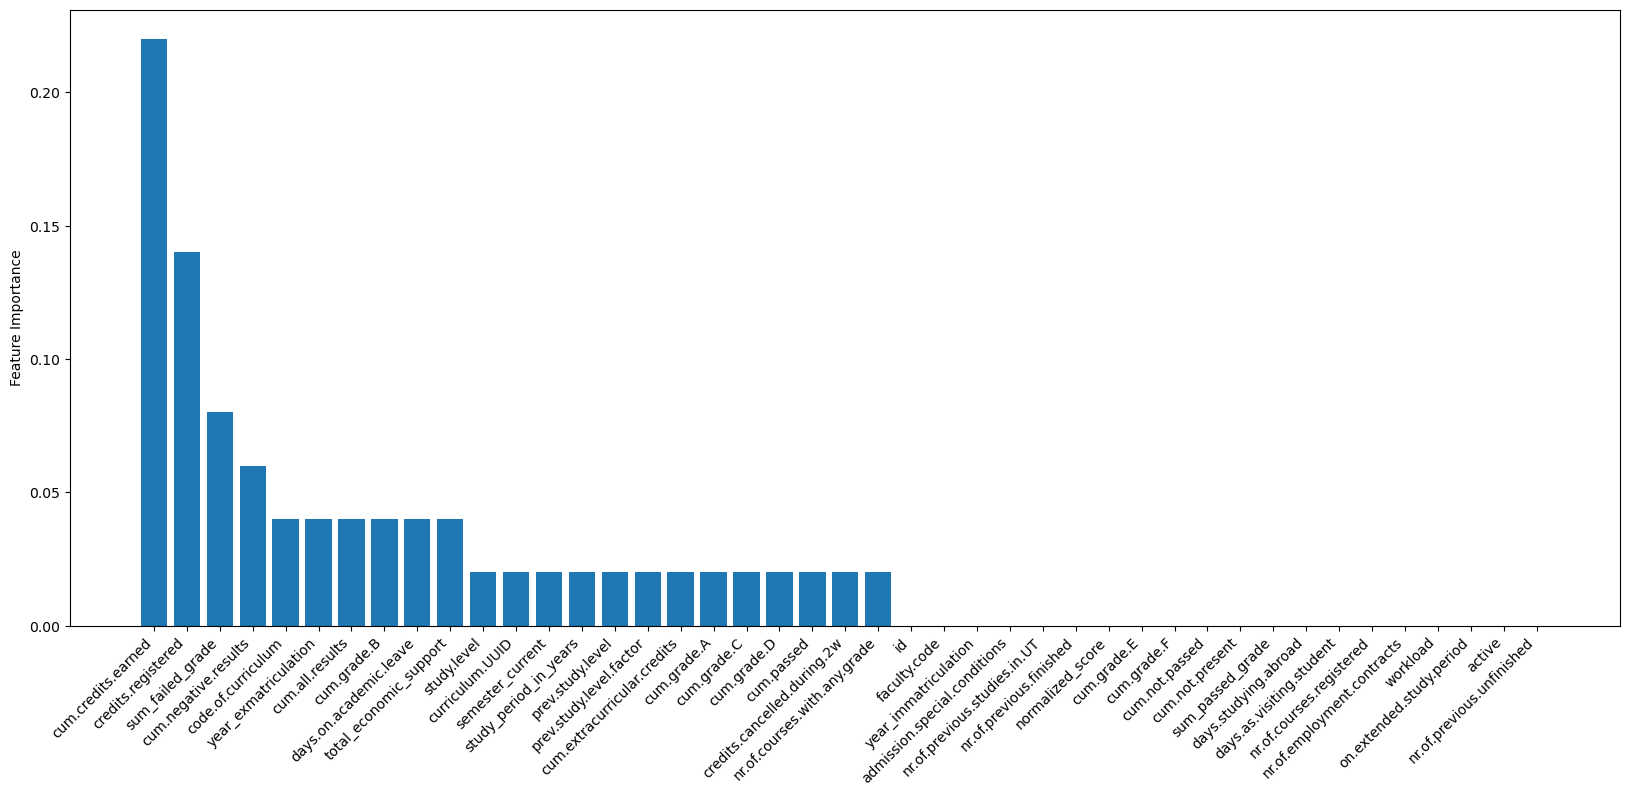

In [36]:
features = list(zip(*features_with_importances))[0]
scores = list(zip(*features_with_importances))[1]

plt.rcParams['figure.figsize'] = [20, 8]

plt.bar(features, scores)
plt.xticks(rotation=45, ha="right")
plt.ylabel('Feature Importance')
plt.show()

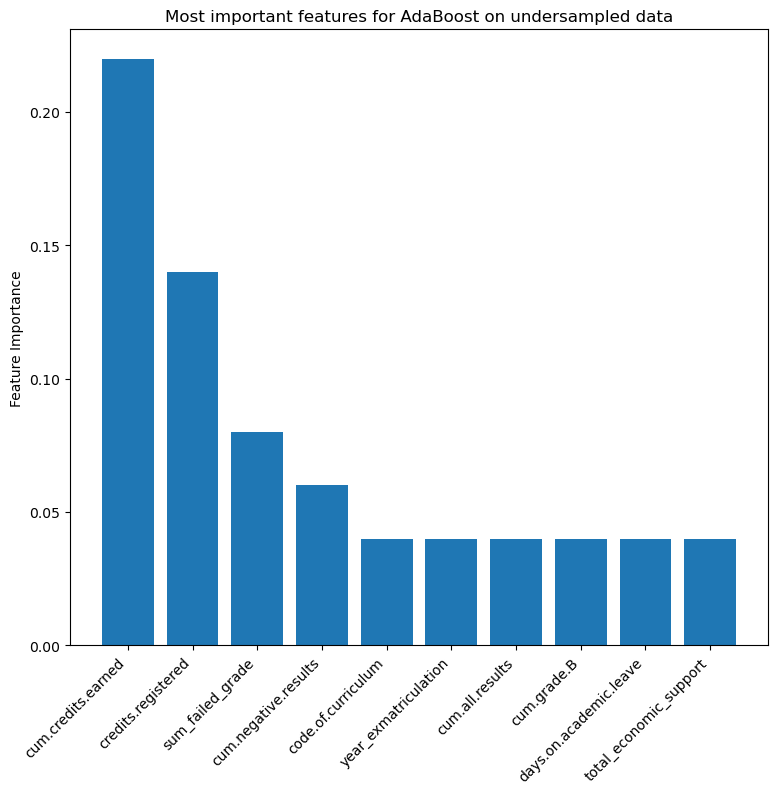

In [37]:
features = list(zip(*features_with_importances[:10]))[0]
scores = list(zip(*features_with_importances[:10]))[1]

plt.rcParams['figure.figsize'] = [9, 8]

plt.bar(features, scores)
plt.xticks(rotation=45, ha="right")
plt.ylabel('Feature Importance')
plt.title('Most important features for AdaBoost on undersampled data')
plt.show()

**Random Forest Classifier on undersampled data**

In [38]:
features_with_importances = list(zip(X2.columns, model_randomForest_2.feature_importances_))
features_with_importances.sort(key = lambda x: x[1], reverse = True)

print("Features with their importance in the model")
for label, importance in features_with_importances:
    print("\t" + label + ":", importance)

Features with their importance in the model
	cum.credits.earned: 0.1280915734341904
	sum_passed_grade: 0.12272453641907972
	nr.of.courses.registered: 0.07330022345867374
	cum.all.results: 0.05697178224218914
	credits.registered: 0.053402233894699634
	nr.of.courses.with.any.grade: 0.04953671723002511
	cum.grade.B: 0.04628356003176629
	semester_current: 0.038359663775116244
	cum.negative.results: 0.030307753310356497
	id: 0.030088356214060807
	cum.grade.A: 0.028011369657309205
	normalized_score: 0.025146145713285988
	cum.extracurricular.credits: 0.0241517873100612
	cum.not.present: 0.023807330199874917
	year_exmatriculation: 0.022742424848577008
	year_immatriculation: 0.020520660325030367
	code.of.curriculum: 0.02026133947527514
	curriculum.UUID: 0.01862031354635301
	cum.passed: 0.0183480207309589
	days.on.academic.leave: 0.018340387306600023
	cum.grade.C: 0.017716852672910642
	credits.cancelled.during.2w: 0.01723116652258049
	sum_failed_grade: 0.016212245779171127
	cum.grade.F: 0.014142

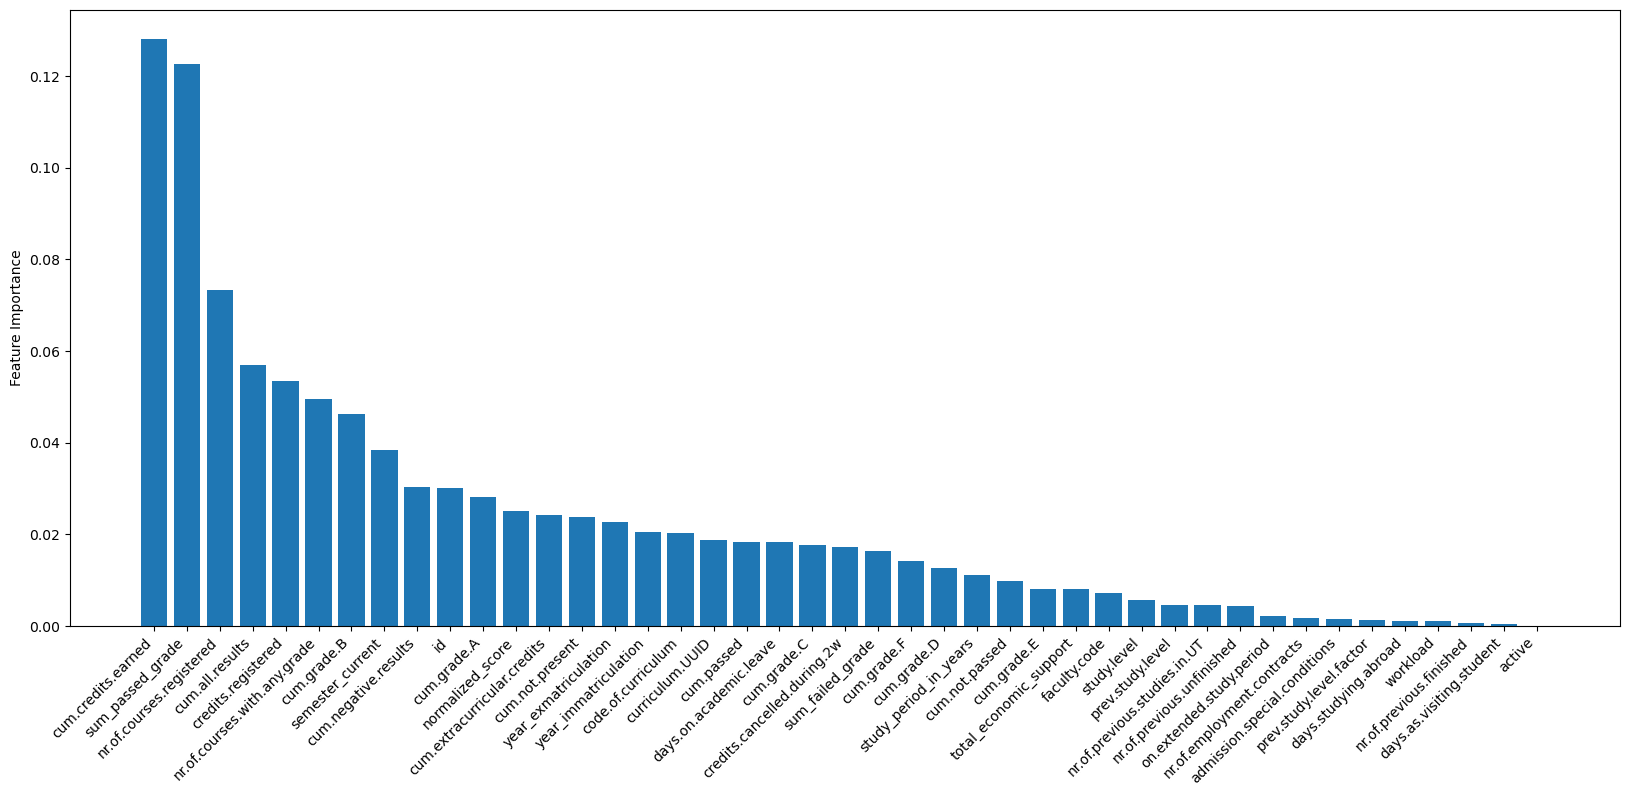

In [39]:
features = list(zip(*features_with_importances))[0]
scores = list(zip(*features_with_importances))[1]

plt.rcParams['figure.figsize'] = [20, 8]

plt.bar(features, scores)
plt.xticks(rotation=45, ha="right")
plt.ylabel('Feature Importance')
plt.show()

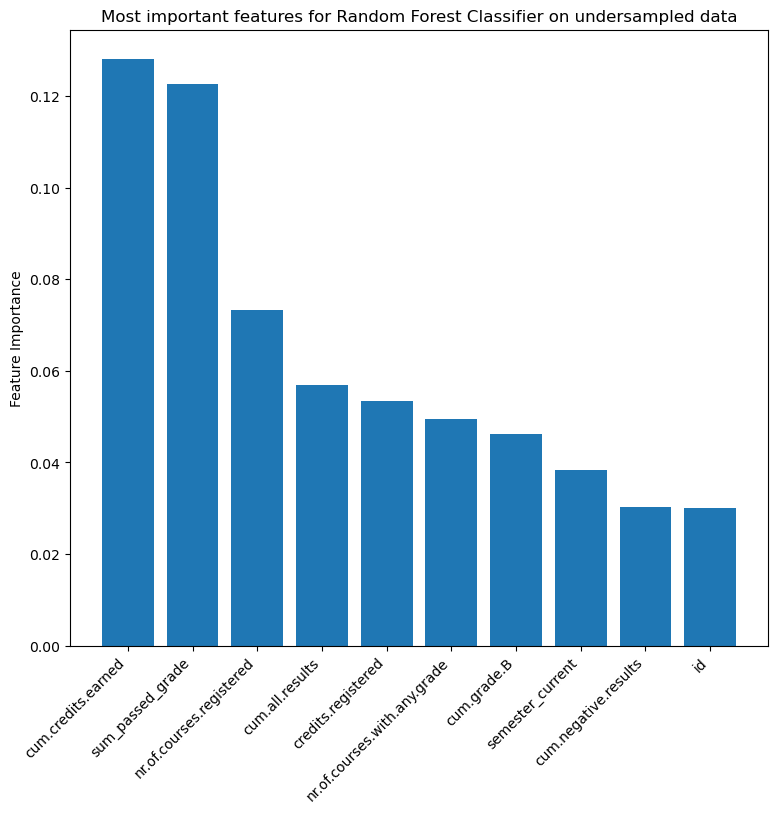

In [40]:
features = list(zip(*features_with_importances[:10]))[0]
scores = list(zip(*features_with_importances[:10]))[1]

plt.rcParams['figure.figsize'] = [9, 8]

plt.bar(features, scores)
plt.xticks(rotation=45, ha="right")
plt.ylabel('Feature Importance')
plt.title('Most important features for Random Forest Classifier on undersampled data')
plt.show()

**Random Forest Classifier on oversampled data**

In [41]:
features_with_importances = list(zip(X3.columns, model_randomForest_3.feature_importances_))
features_with_importances.sort(key = lambda x: x[1], reverse = True)

print("Features with their importance in the model")
for label, importance in features_with_importances:
    print("\t" + label + ":", importance)

Features with their importance in the model
	cum.credits.earned: 0.10826529846666785
	sum_passed_grade: 0.09561484007909828
	credits.registered: 0.08570901442139531
	nr.of.courses.registered: 0.06661978065660319
	nr.of.courses.with.any.grade: 0.0558240882409483
	cum.all.results: 0.05189051187793242
	cum.grade.A: 0.04264241675406004
	semester_current: 0.035254299691027904
	cum.grade.B: 0.033913448526967885
	id: 0.03168251609472394
	cum.negative.results: 0.030444280799377863
	normalized_score: 0.026399474676911713
	cum.passed: 0.02517798358336402
	cum.not.present: 0.02419120640129896
	cum.grade.C: 0.02413919367591899
	year_exmatriculation: 0.0216671115616433
	curriculum.UUID: 0.02041488402832579
	year_immatriculation: 0.020331531830717762
	code.of.curriculum: 0.020152755933117286
	cum.extracurricular.credits: 0.020036207337608594
	sum_failed_grade: 0.019070383180402675
	days.on.academic.leave: 0.01801037125721108
	credits.cancelled.during.2w: 0.01742487690352588
	study_period_in_years: 0

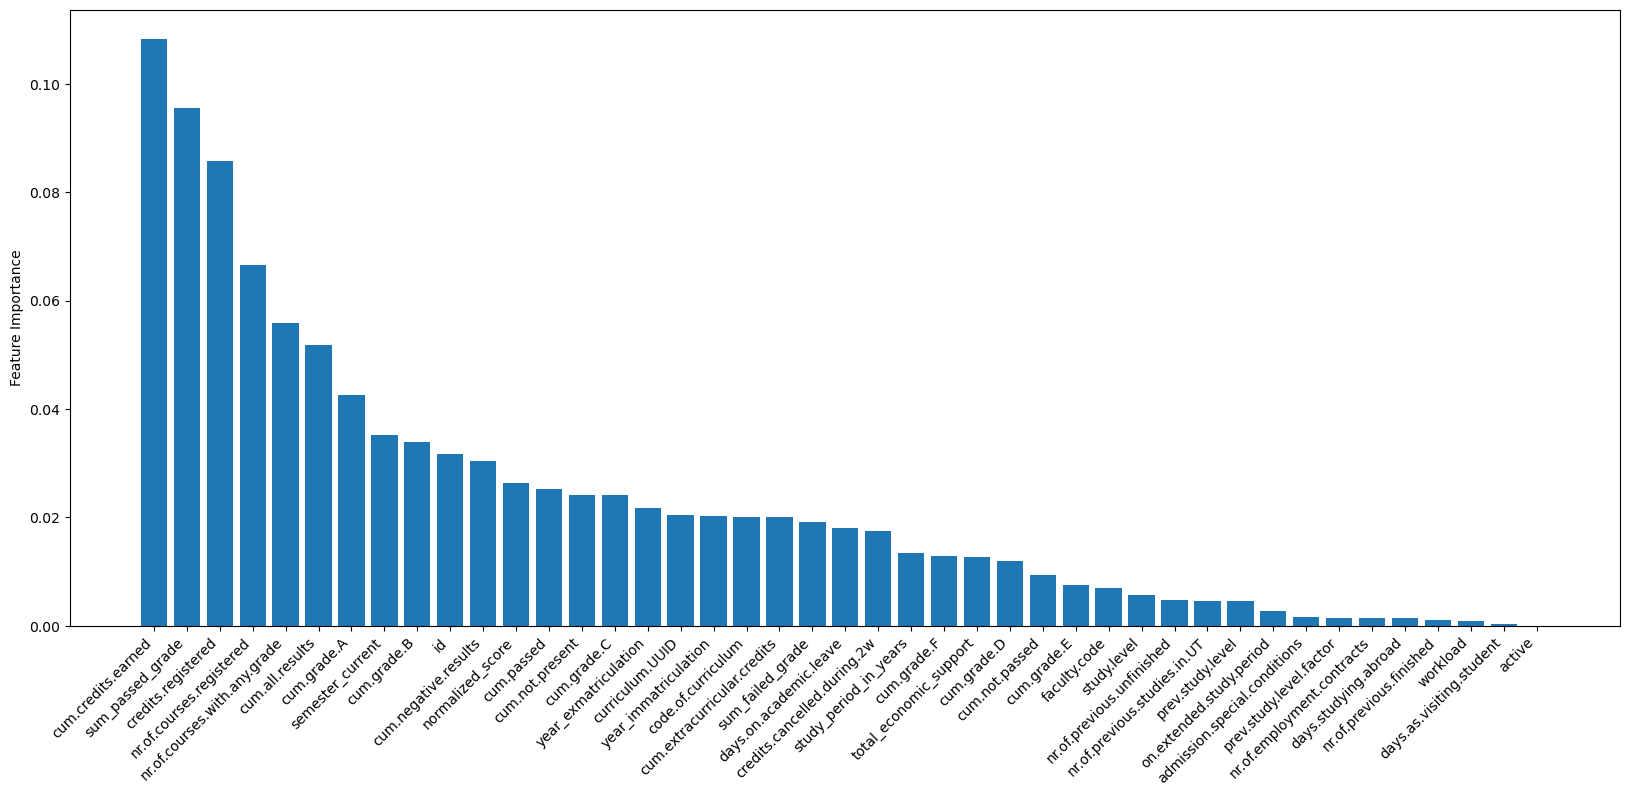

In [42]:
features = list(zip(*features_with_importances))[0]
scores = list(zip(*features_with_importances))[1]

plt.rcParams['figure.figsize'] = [20, 8]

plt.bar(features, scores)
plt.xticks(rotation=45, ha="right")
plt.ylabel('Feature Importance')
plt.show()

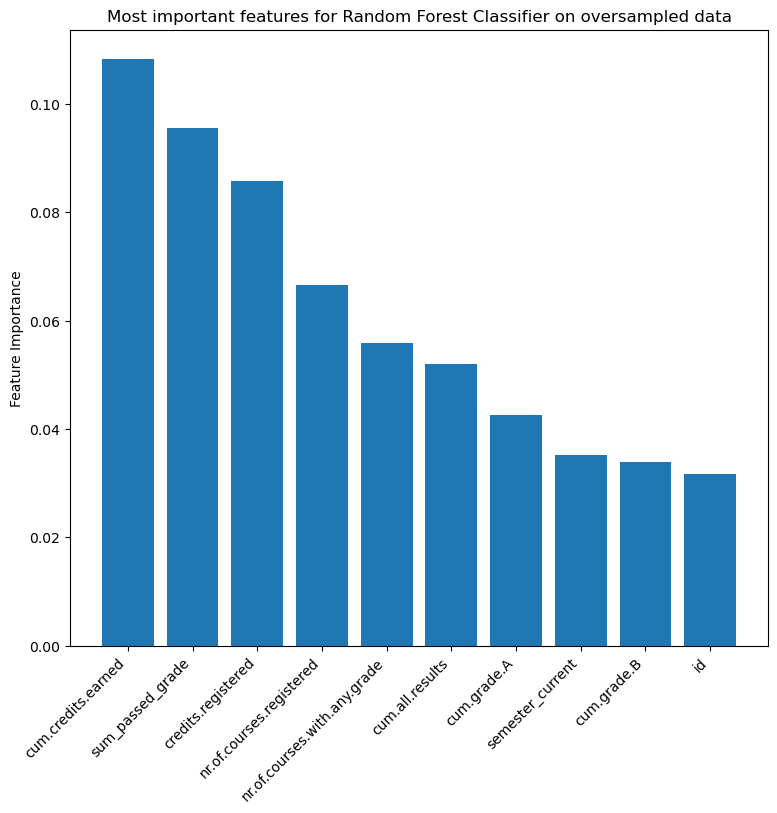

In [43]:
features = list(zip(*features_with_importances[:10]))[0]
scores = list(zip(*features_with_importances[:10]))[1]

plt.rcParams['figure.figsize'] = [9, 8]

plt.bar(features, scores)
plt.xticks(rotation=45, ha="right")
plt.ylabel('Feature Importance')
plt.title('Most important features for Random Forest Classifier on oversampled data')
plt.show()